[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 37** | Regressão Logística II | Exercício 2

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 23 de maio de 2025.

---

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd

df = pd.read_feather(r'C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 37 - Regressão Logística II\ex057\credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [2]:
# Convertendo data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Ordenando por data_ref
df = df.sort_values('data_ref')

# Identificando os últimos 3 meses únicos como oot
ultimas_safras = df['data_ref'].unique()[-3:]
df_oot = df[df['data_ref'].isin(ultimas_safras)]
df_dev = df[~df['data_ref'].isin(ultimas_safras)]

print(f"Desenvolvimento: {df_dev.shape[0]} linhas")
print(f"Out of Time: {df_oot.shape[0]} linhas")

Desenvolvimento: 600000 linhas
Out of Time: 150000 linhas


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [3]:
# números de linhas por mês
print(df['data_ref'].value_counts().sort_index())

data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64


In [4]:
# qualitativas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
for var in qualitativas:
    print(f"\n{var}:")
    print(df[var].value_counts(normalize=True))


sexo:
sexo
F    0.672773
M    0.327227
Name: proportion, dtype: float64

posse_de_veiculo:
posse_de_veiculo
N    0.610605
S    0.389395
Name: proportion, dtype: float64

posse_de_imovel:
posse_de_imovel
S    0.671589
N    0.328411
Name: proportion, dtype: float64

tipo_renda:
tipo_renda
Assalariado         0.514320
Empresário          0.230283
Pensionista         0.168353
Servidor público    0.086563
Bolsista            0.000481
Name: proportion, dtype: float64

educacao:
educacao
Médio                  0.675781
Superior completo      0.272408
Superior incompleto    0.039295
Fundamental            0.011433
Pós graduação          0.001083
Name: proportion, dtype: float64

estado_civil:
estado_civil
Casado      0.701963
Solteiro    0.122212
União       0.076913
Separado    0.056761
Viúvo       0.042151
Name: proportion, dtype: float64

tipo_residencia:
tipo_residencia
Casa             0.899059
Com os pais      0.044309
Governamental    0.031253
Aluguel          0.013799
Estúdio         

In [5]:
# quantitativas
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
print(df[quantitativas].describe())

          qtd_filhos          idade  tempo_emprego  qt_pessoas_residencia  \
count  750000.000000  750000.000000  624043.000000          750000.000000   
mean        0.433251      43.804733       7.748574               2.212241   
std         0.739379      11.229868       6.687455               0.903428   
min         0.000000      22.000000       0.117808               1.000000   
25%         0.000000      34.000000       3.049315               2.000000   
50%         0.000000      43.000000       6.046575               2.000000   
75%         1.000000      53.000000      10.183562               3.000000   
max        14.000000      68.000000      42.906849              15.000000   

              renda  
count  7.500000e+05  
mean   2.323854e+04  
std    7.910601e+04  
min    1.076700e+02  
25%    3.467700e+03  
50%    7.861820e+03  
75%    1.831828e+04  
max    4.083986e+06  


## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

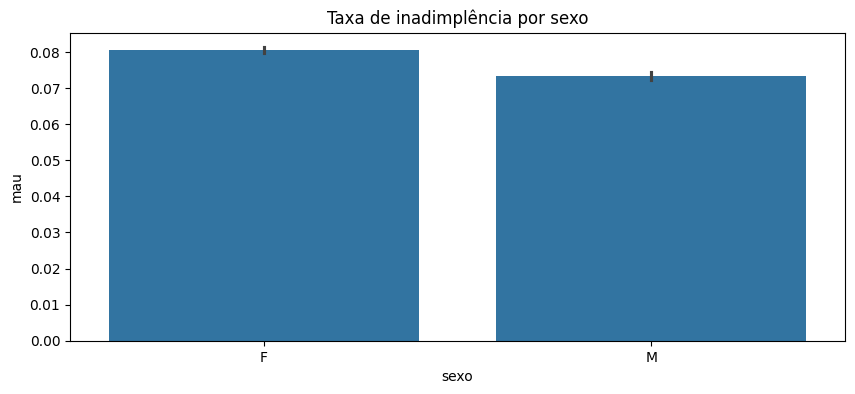

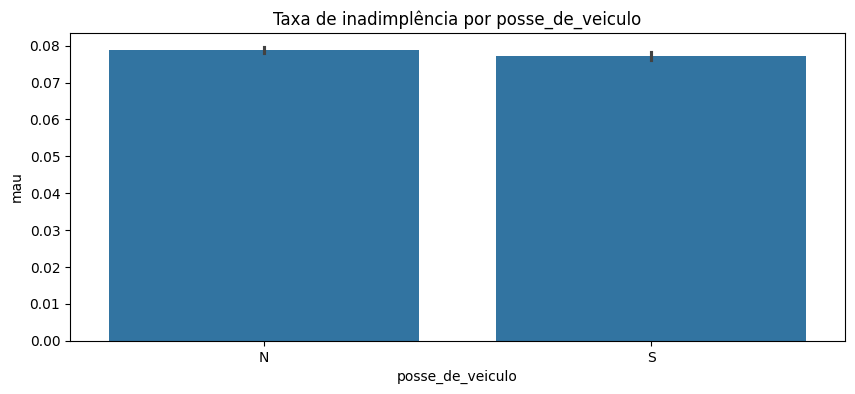

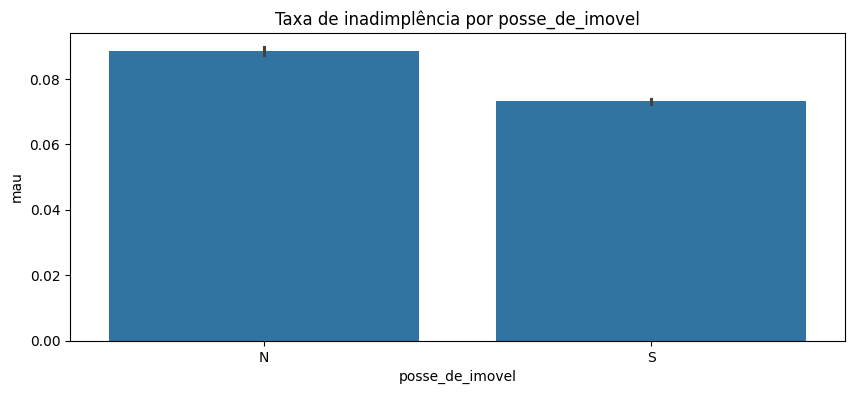

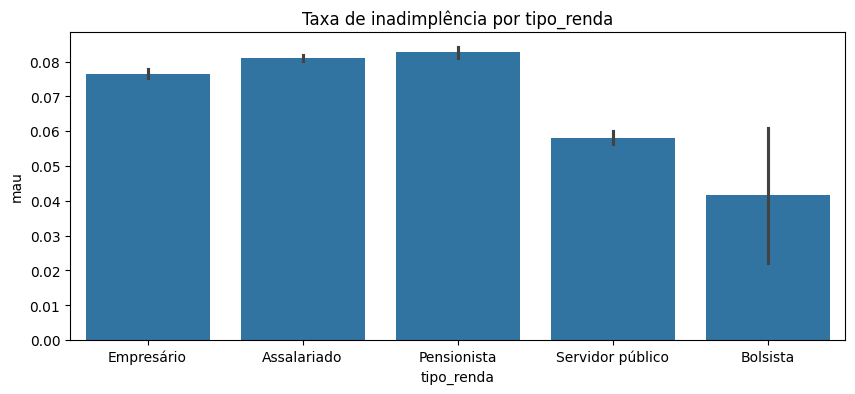

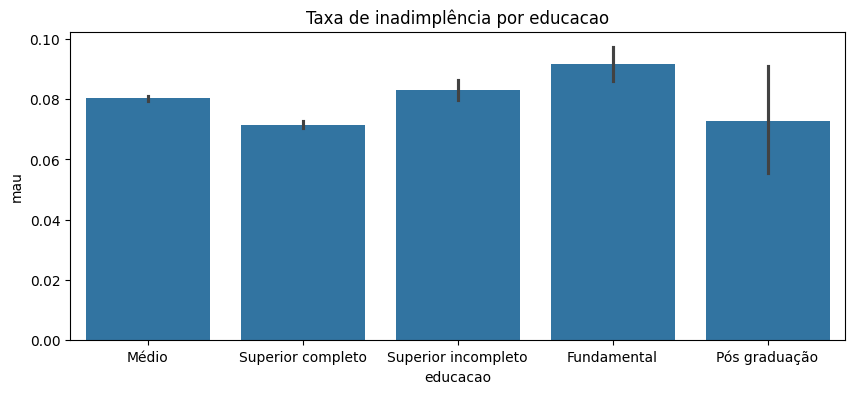

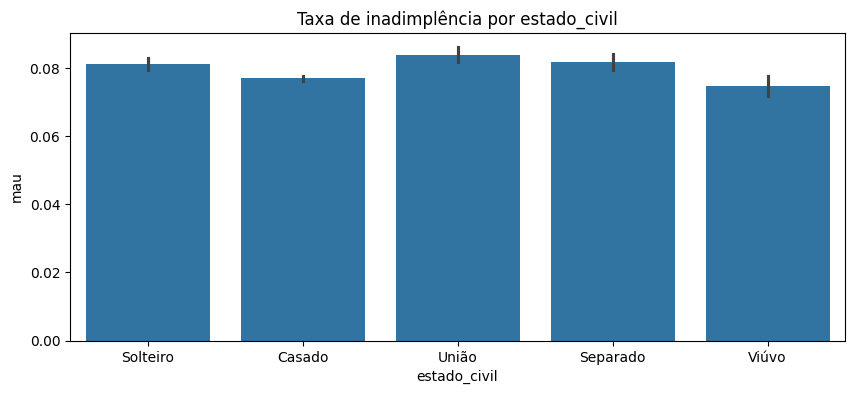

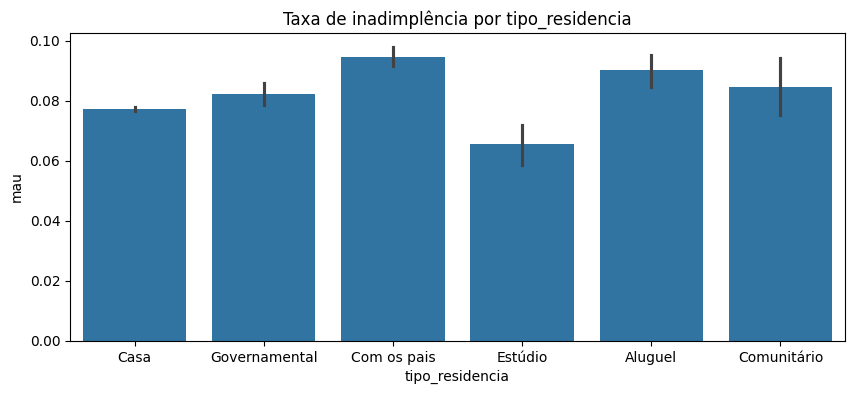

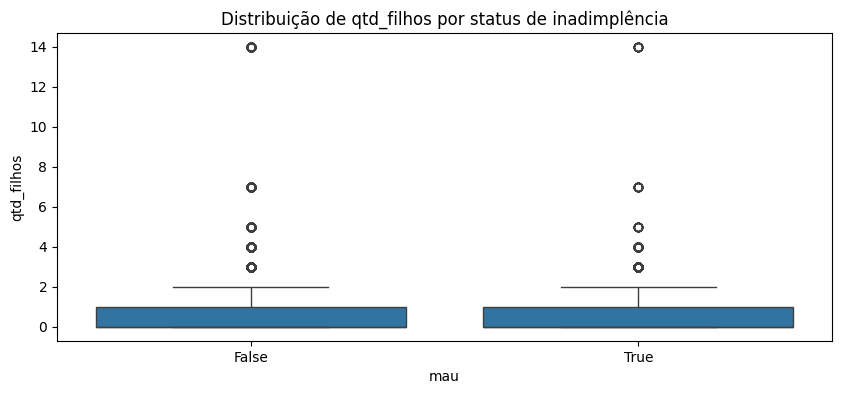

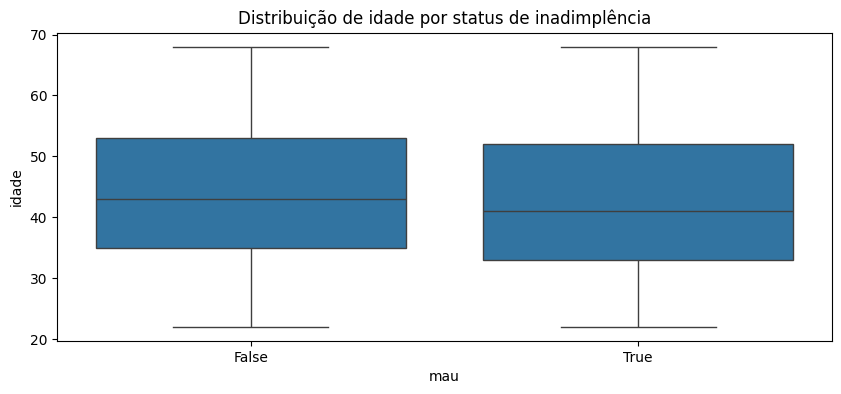

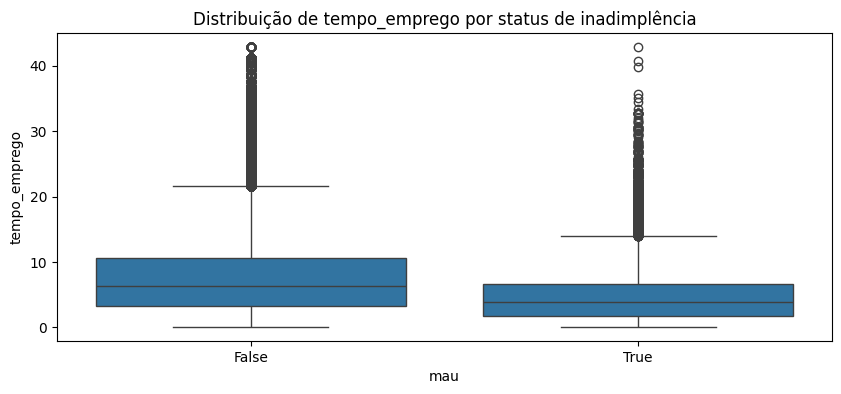

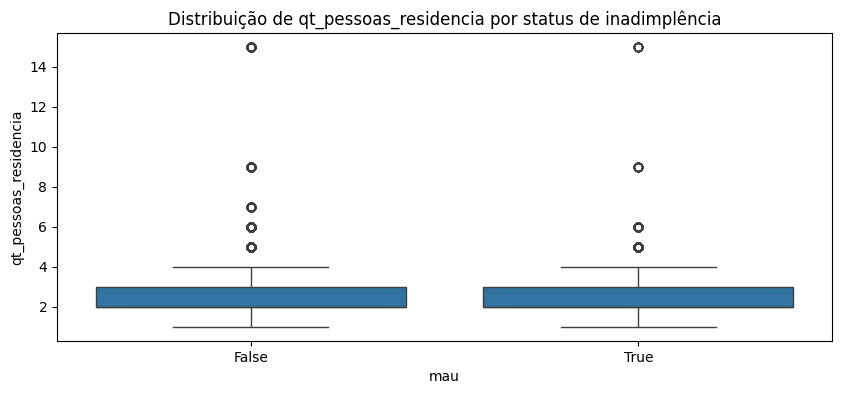

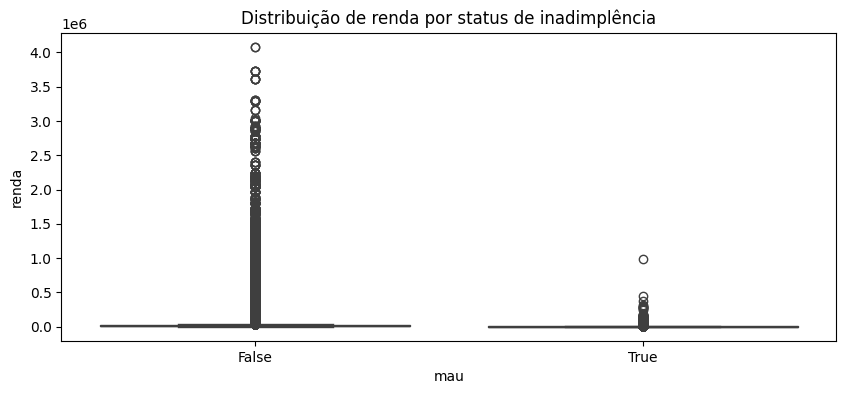

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para variáveis qualitativas
for var in qualitativas:
    plt.figure(figsize=(10,4))
    sns.barplot(x=var, y='mau', data=df)
    plt.title(f'Taxa de inadimplência por {var}')
    plt.show()

# Para variáveis quantitativas
for var in quantitativas:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='mau', y=var, data=df)
    plt.title(f'Distribuição de {var} por status de inadimplência')
    plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Verificação inicial de missing values
print("Missing values antes do tratamento:")
print(df_dev.isna().sum())

# 2. Tratamento completo de missing values
# Para variáveis numéricas - preencher com a mediana
numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
for col in numeric_features:
    df_dev[col] = df_dev[col].fillna(df_dev[col].median())
    
# Para variáveis categóricas - preencher com a moda
categorical_features = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
                      'educacao', 'estado_civil', 'tipo_residencia']
for col in categorical_features:
    df_dev[col] = df_dev[col].fillna(df_dev[col].mode()[0])

# 3. Verificação pós-tratamento
print("\nMissing values após tratamento:")
print(df_dev.isna().sum())

# 4. Modelagem com tratamento de missings no pipeline (abordagem mais robusta)
from sklearn.impute import SimpleImputer

# Pipeline atualizado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# 5. Preparação dos dados
X = df_dev.drop(['mau', 'data_ref', 'index'], axis=1)
y = df_dev['mau']

# 6. Verificação final
print("\nValores únicos na variável target (y):")
print(y.value_counts())

# 7. Treinamento do modelo
try:
    model.fit(X, y)
    print("\nModelo treinado com sucesso!")
except Exception as e:
    print("\nErro durante o treinamento:")
    print(e)

Missing values antes do tratamento:
data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            100875
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64


C:\Users\earap\AppData\Local\Temp\ipykernel_4792\616672559.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev[col] = df_dev[col].fillna(df_dev[col].median())
C:\Users\earap\AppData\Local\Temp\ipykernel_4792\616672559.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev[col] = df_dev[col].fillna(df_dev[col].mode()[0])



Missing values após tratamento:
data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64

Valores únicos na variável target (y):
mau
False    563357
True      36643
Name: count, dtype: int64

Modelo treinado com sucesso!


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Função para calcular KS
def calculate_ks(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    return max(tpr - fpr)

# Avaliação na base de desenvolvimento
y_pred_dev = model.predict_proba(X)[:, 1]
print("\nDesenvolvimento:")
print(f"Acurácia: {accuracy_score(y, model.predict(X)):.4f}")
print(f"Gini: {2*roc_auc_score(y, y_pred_dev)-1:.4f}")
print(f"KS: {calculate_ks(y, y_pred_dev):.4f}")

# Avaliação na base OOT
X_oot = df_oot.drop(['mau', 'data_ref', 'index'], axis=1)
y_oot = df_oot['mau']
y_pred_oot = model.predict_proba(X_oot)[:, 1]
print("\nOut of Time:")
print(f"Acurácia: {accuracy_score(y_oot, model.predict(X_oot)):.4f}")
print(f"Gini: {2*roc_auc_score(y_oot, y_pred_oot)-1:.4f}")
print(f"KS: {calculate_ks(y_oot, y_pred_oot):.4f}")


Desenvolvimento:
Acurácia: 0.5509
Gini: 0.5243
KS: 0.3906

Out of Time:
Acurácia: 0.3088
Gini: 0.4303
KS: 0.3137


## 🔎 1. Avaliação na base de desenvolvimento (treinamento)

* Acurácia: 0.5509

    * A acurácia está próxima do aleatório (50%), o que é esperado em bases desbalanceadas como em problemas de inadimplência. Ou seja, o modelo não está classificando com alta confiança.

* Gini: 0.5243

    * Um Gini acima de 0.5 já indica que o modelo tem alguma capacidade discriminante (0.5 = limite do aleatório).

    * Interpretação: o modelo consegue ordenar os clientes de forma razoável em relação ao risco, embora não seja excelente.

* KS: 0.3906

    * O Kolmogorov-Smirnov mede a separação entre as distribuições de bons e maus pagadores.

    * Um KS acima de 0.30 é geralmente considerado aceitável. Aqui, 0.39 indica que o modelo tem uma separação razoável na base de treino.

## 🕒 2. Avaliação na base Out of Time (OOT)

* Acurácia: 0.3088

    * Caiu significativamente, o que é preocupante. Isso sugere que o modelo não generaliza bem para dados futuros, e possivelmente está superajustado ao período de treino.

* Gini: 0.4303

    * Ainda acima de 0.4, o que mostra que há algum poder de ordenação, mas bem menor que na base de desenvolvimento.

* KS: 0.3137

    * Está no limite inferior do aceitável. Isso reforça a ideia de que o modelo ainda capta alguma informação relevante, mas perde força fora do período de treino.

## 📌 Resumo e Conclusão

* O modelo tem capacidade preditiva razoável, especialmente dentro do período de desenvolvimento.

* No entanto, ele não generaliza bem para novos períodos, o que compromete sua aplicabilidade em produção.

* Esse padrão indica possível overfitting, sazonalidade ou mudanças comportamentais entre as safras.